In [368]:
def flagger (data):

    #data = "2012,AO,Artisanal opportunities,future,0,Global average,80.74,"
    #data[r][c]
    #counts

    scenerioCounter=0
    goalsCounter=0
    longGoalCounter=0
    dimensionCounter=0
    regionIDCounter=0
    region_nameCounter=0
    valueCounter=0


    for i in range(len(data)):


        if (not(data[i][0].isdigit())):
            scenerioCounter=scenerioCounter+1

            #print("Scenerio: " + str(data[i][0]))

        if (not(data[i][1].isalpha())):
            goalsCounter=goalsCounter+1

            #print("goals: " + str(data[i][1]))

        if (not(data[i][2].replace(" ","").replace("&","").replace("(","").replace(")","").isalpha())):
            longGoalCounter=longGoalCounter+1

            #print("long goal: " + str(data[i][2]))

        if (not(data[i][3].isalpha())):
            dimensionCounter=dimensionCounter+1

            #print("dimension " + str(data[i][3]))

        if (not(data[i][4].isdigit())):
            regionIDCounter=regionIDCounter+1

            #print("region ID: " + str(data[i][4]))

        if (not(data[i][5].replace(" ","").replace("_","").replace("(","").replace(")","").replace("-","").isalpha())):
            region_nameCounter=region_nameCounter+1

            #print("region name: " + str(data[i][5]))

        if (not(data[i][6].replace(".","").replace("-","").isdigit())):
            valueCounter=valueCounter+1

            #print("value: " + str(data[i][6]))

    return scenerioCounter, goalsCounter, longGoalCounter, dimensionCounter, regionIDCounter, region_nameCounter, valueCounter

dataset = open('DataTestNI.txt')
lines = dataset.readlines()
row = []
for line in lines:

    row.append(line.strip().split(","))

typeerror_count = flagger(row)

In [369]:
import pandas as pd
import numpy as np

In [370]:
# Import excel data into python

# OHIdata = 'OHIData.xlsx'
# OHI = pd.read_excel(OHIdata)

OHI = pd.read_csv('OHIDataSet.csv')

In [371]:
colheaders = list(OHI.columns.values)

In [372]:
# Check number of missing/NA values ~ if over 80% then remove

unwanted = [column for column in OHI.columns 
                if OHI[column].isna().sum()/len(OHI[column]) > 0.2]
unwanted = "".join(unwanted)
OHI = OHI.drop(unwanted, axis=1)

In [373]:
# Verify if colnames match

from collections import Counter

des_colnames = ['scenario','goals','long_goal','dimension','region_id','region_name','value']
colheaders = list(OHI.columns.values)

def compare(s, t):
    return Counter(s) == Counter(t)

col_ver = compare(des_colnames, colheaders)

In [374]:
# List number of missing/NA in other cases

NAcount = OHI.isna().sum()/len(OHI)

In [375]:
# If there are any fully blank entries remove the rows

OHIpre = len(OHI)
OHI = OHI.dropna(how='all')
OHIpost = len(OHI)
diff = OHIpre - OHIpost

In [376]:
contain_uniqueid = (len(OHI.iloc[:, 0].unique()) == len(OHI),
    len(OHI.iloc[:, 1].unique()) == len(OHI),
    len(OHI.iloc[:, 2].unique()) == len(OHI),
    len(OHI.iloc[:, 3].unique()) == len(OHI),
    len(OHI.iloc[:, 4].unique()) == len(OHI),
    len(OHI.iloc[:, 5].unique()) == len(OHI),
    len(OHI.iloc[:, 6].unique()) == len(OHI))

contain_uniqueid = contain_uniqueid.count("True")

In [377]:
# Adding column for unique ID ~ combine all non-numeric values

OHI['unique_key'] = OHI[['scenario','goals','dimension','region_id']].astype(str).sum(axis=1)

In [378]:
#`

In [379]:
# Create  scoring system

# Are there any mismatched types
if sum(typeerror_count) == 0:
    score1 = 1
else:
    score1 = 0

if col_ver == True:
    score2 = 1
else:
    score2 = 0
    
score3 = 1 -sum(NAcount)/len(OHI.columns)

if unwanted == "NA":
    score4 = 1
else:
    score4 = 0

if diff == 0:
    score5 = 1
else:
    score5 = 0
    
if contain_uniqueid == 1:
    score6 = 1
else:
    score6 = 0

In [380]:
scores = score1, score2, score3, score4, score5, score6

In [381]:
totalscore = np.mean(scores)
totalscore_opp = 1 - totalscore

# Data Fitness Assesment

### Total Data Fitness Score

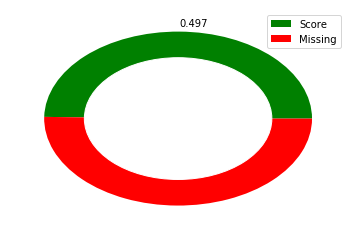

In [382]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('GTK',warn=False, force=True)

totalscore = np.round(totalscore, decimals=3)

size_of_groups=[totalscore, totalscore_opp]
names=totalscore, ''
cols = 'green', 'red'
plt.pie(size_of_groups, labels=names, colors = cols)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(["Score", "Missing"])
plt.show()

# Add legend

### Evaluation Decision

In [383]:
if scores.count(0) >=1:
    eval = "FAIL"
else:
    eval = "PASS"
    
print("This dataset recieves a", eval)
print("")
print("If any of the essential checks covered reveals flags then the dataset is assigned a fail.")

This dataset recieves a FAIL

If any of the essential checks covered reveals flags then the dataset is assigned a fail.


### Flagged Controls

In [384]:
numflags = scores.count(0)
print('The number of flagged controls is:', numflags)

The number of flagged controls is: 3


In [385]:
# List of flagged controls

indexes = [index for index in range(len(scores)) if scores[index] == 0]
scorenames = ["Type mismatch", "Header mismatch", "NA column", "Extra columns", "NA rows", "Missing unique ID"]

In [386]:
flags = [scorenames[i] for i in indexes]
print('The areas that were flagged are', flags)

The areas that were flagged are ['Type mismatch', 'Extra columns', 'Missing unique ID']


### FAIR Criteria

In [387]:
#`